## Import Stuff

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Asset Configuration

In [2]:
# DOW Jones = ^DJI
# Nasdaq = ^IXIC
# S&P500 = ^GSPC
# Russell = ^RUT

# Gold = GC=F
# Silver = SI=F
# Platinum PL=F
# Palladium = PA=F
# Copper = HG=F

# Crude = CL=F
# Brent = BZ=F


S1T = 'BZ=F'
S2T = 'CL=F'

start="2023-01-14"
end=None
interval="1d"

In [3]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

## Download Data & Package

In [4]:
gData = yf.download(S1T, start=start, end=end, interval=interval)
sData = yf.download(S2T, start=start, end=end, interval=interval)

pData = pd.DataFrame()
pData['gClose'], pData['sClose'], pData['gOpen'], pData['sOpen'] = gData['Close'], sData['Close'], gData['Open'], sData['Open']

# Calculate Ratio
pData['openRatio'] = pData['gOpen'] / pData['sOpen']
pData['closeRatio'] = pData['gClose'] / pData['sClose']

# Calculate Ratio ZScore
pData['openRatioZscore'] = zscore(pData['sOpen'] / pData['gOpen'])
pData['closeRatioZscore'] = zscore(pData['sClose'] / pData['gClose'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Price Chart

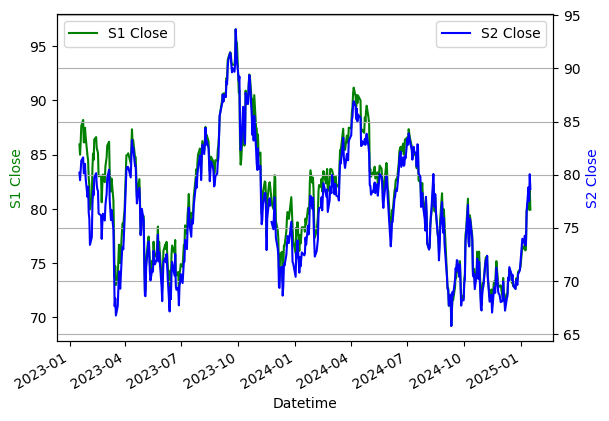

In [5]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
pData['gClose'].plot(ax=ax1, color='g', label='S1 Close')
pData['sClose'].plot(ax=ax2, color='b', label='S2 Close')

ax1.set_xlabel('Datetime')
ax1.set_ylabel('S1 Close', color='g')
ax2.set_ylabel('S2 Close', color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

## Spread

<Axes: xlabel='Date'>

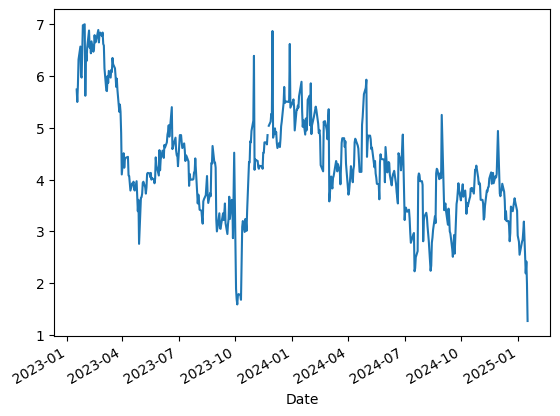

In [6]:
# Calculate Spread
pData['openSpread'] = pData['gOpen'] - pData['sOpen']
pData['closeSpread'] = pData['gClose'] - pData['sClose']

pData['closeSpread'].plot()

## Correlation

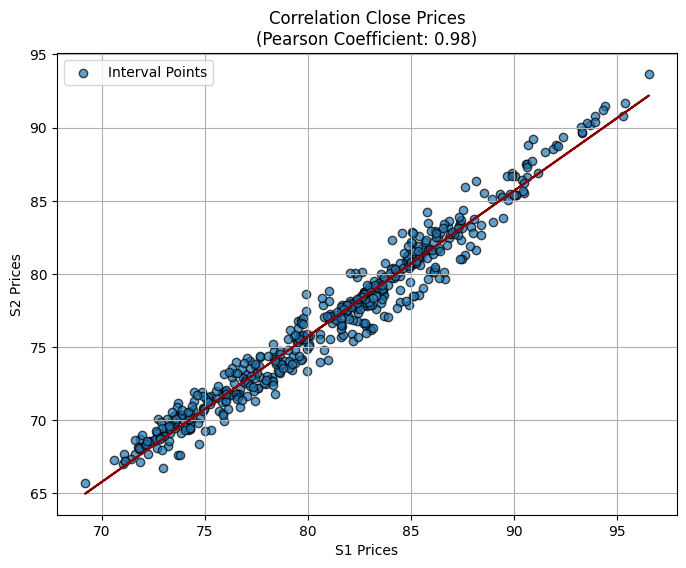

In [7]:
# Prepare the data
X = pData['gClose'].values.reshape(-1, 1)
y = pData['sClose'].fillna(pData['sClose'].mean()).values

pearson_corr = pData['gClose'].corr(pData['sClose'], method="pearson")

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Plot the scatter plot and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(pData['gClose'], pData['sClose'], alpha=0.7, edgecolors='k', label='Interval Points')
plt.plot(pData['gClose'], y_pred, color='darkred')
plt.title(f'Correlation Close Prices\n(Pearson Coefficient: {pearson_corr:.2f})')
plt.xlabel('S1 Prices')
plt.ylabel('S2 Prices')
plt.legend()
plt.grid(True)
plt.show()

## Spread Z-score

C:\Users\Antik\AppData\Local\Temp\ipykernel_12484\479156824.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  oB = oResults.params[1]
C:\Users\Antik\AppData\Local\Temp\ipykernel_12484\479156824.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cB = cResults.params[1]


<Axes: xlabel='Date'>

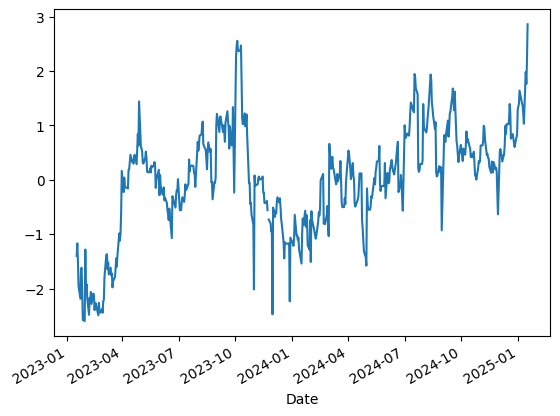

In [8]:
oS1 = sm.add_constant(pData['gOpen'])
cS1 = sm.add_constant(pData['gClose'])

oResults = sm.OLS(pData['sOpen'], oS1).fit()
cResults = sm.OLS(pData['sClose'], cS1).fit()

oB = oResults.params[1]
cB = cResults.params[1]

oSpread = pData['sOpen'] - oB * pData['gOpen']
cSpread = pData['sClose'] - cB * pData['gClose']

pData['openSpreadZscore'] = zscore(pData['sOpen'] - pData['gOpen'])
pData['closeSpreadZscore'] = zscore(pData['sClose'] - pData['gClose'])

pData['closeSpreadZscore'].plot()

## Test

In [9]:
from test import runtest

tData = []

testData = runtest(tData)

ImportError: cannot import name 'runtest' from 'test' (unknown location)